<a href="https://colab.research.google.com/github/hmdaalln/Group7/blob/main/Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

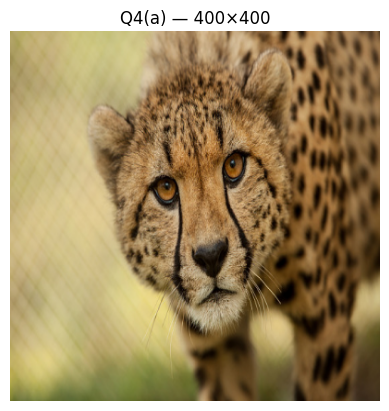

In [1]:
# Q4(a) Resize to 400x400
import cv2 as cv,urllib.request, matplotlib.pyplot as plt

# download once if not already
url = "https://ids.si.edu/ids/deliveryService?id=NZP-20140817-6602RG-000003&max_w=550"
urllib.request.urlretrieve(url, "ASG3.JPG")

img = cv.imread("ASG3.JPG")
img400 = cv.resize(img, (400, 400), interpolation=cv.INTER_AREA)
cv.imwrite("ASG3_400x400.jpg", img400)

plt.imshow(cv.cvtColor(img400, cv.COLOR_BGR2RGB))
plt.title("Q4(a) — 400×400")
plt.axis("off")
plt.show()

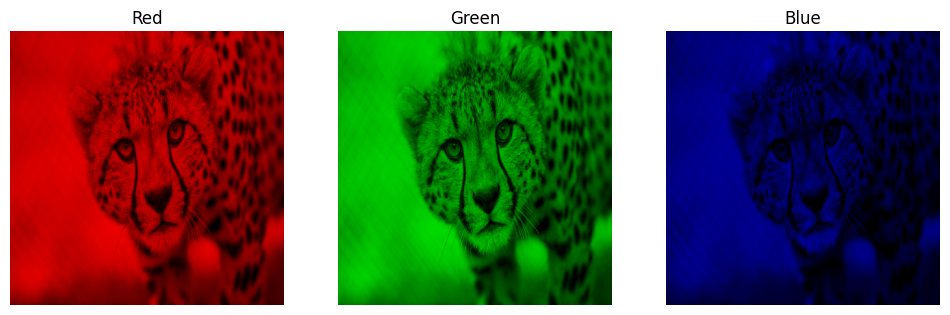

In [2]:
# Q4(b) Separate R, G, B channels as color images
import cv2 as cv, matplotlib.pyplot as plt
img = cv.imread("ASG3_400x400.jpg")

b,g,r = cv.split(img)

zeros = b*0
R_colored = cv.merge([zeros, zeros, r])
G_colored = cv.merge([zeros, g, zeros])
B_colored = cv.merge([b, zeros, zeros])

cv.imwrite("ASG3_R_color.jpg", R_colored)
cv.imwrite("ASG3_G_color.jpg", G_colored)
cv.imwrite("ASG3_B_color.jpg", B_colored)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv.cvtColor(R_colored, cv.COLOR_BGR2RGB)); plt.title("Red"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv.cvtColor(G_colored, cv.COLOR_BGR2RGB)); plt.title("Green"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv.cvtColor(B_colored, cv.COLOR_BGR2RGB)); plt.title("Blue"); plt.axis("off")
plt.show()

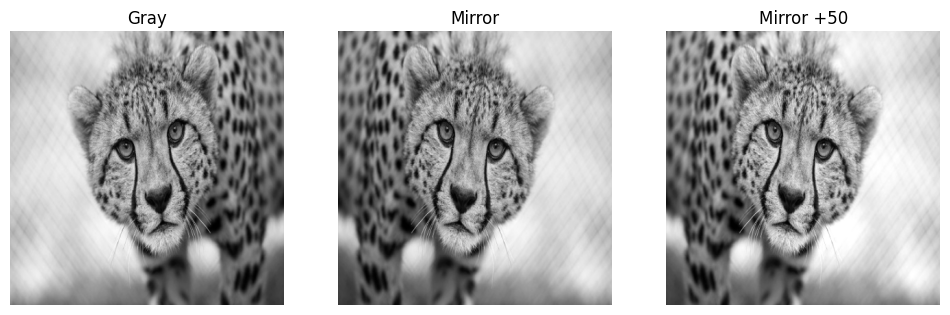

In [3]:
# Q4(c) Grayscale → mirror horizontally → add 50
import cv2 as cv, matplotlib.pyplot as plt
img = cv.imread("ASG3_400x400.jpg")

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_mirror = cv.flip(gray, 1)
gray_plus50 = cv.add(gray_mirror, 50)

cv.imwrite("ASG3_gray.jpg", gray)
cv.imwrite("ASG3_gray_mirror.jpg", gray_mirror)
cv.imwrite("ASG3_gray_mirror_plus50.jpg", gray_plus50)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(gray, cmap="gray"); plt.title("Gray"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(gray_mirror, cmap="gray"); plt.title("Mirror"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(gray_plus50, cmap="gray"); plt.title("Mirror +50"); plt.axis("off")
plt.show()

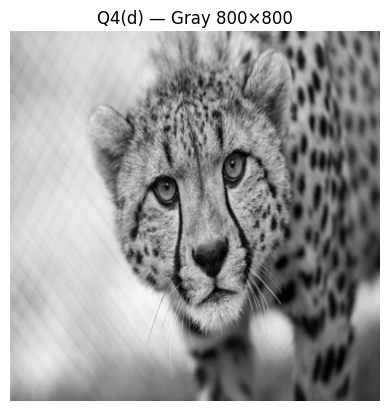

In [4]:
# Q4(d) Upscale grayscale to 800x800
import cv2 as cv, matplotlib.pyplot as plt
gray = cv.imread("ASG3_gray.jpg", cv.IMREAD_GRAYSCALE)

gray800 = cv.resize(gray, (800,800), interpolation=cv.INTER_CUBIC)
cv.imwrite("ASG3_gray_800x800.jpg", gray800)

plt.imshow(gray800, cmap="gray")
plt.title("Q4(d) — Gray 800×800")
plt.axis("off")
plt.show()


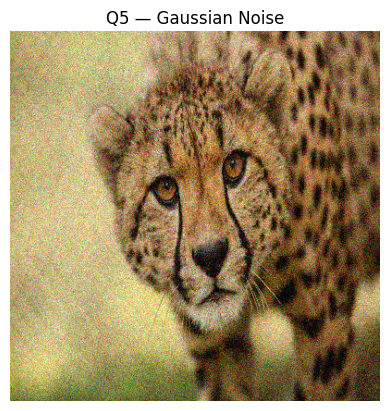

In [56]:
# Q5 — Generate Gaussian noise image (base for a, b, c)
import cv2 as cv, numpy as np, matplotlib.pyplot as plt

img = cv.imread("ASG3_400x400.jpg")   # use Q4(a) result

# Add Gaussian noise
noise = np.random.normal(0, 25, img.shape).astype(np.float32)
noisy = np.clip(img.astype(np.float32) + noise, 0, 255).astype(np.uint8)

cv.imwrite("Q5_gaussian_noise.jpg", noisy)

plt.imshow(cv.cvtColor(noisy, cv.COLOR_BGR2RGB))
plt.title("Q5 — Gaussian Noise")
plt.axis("off")
plt.show()

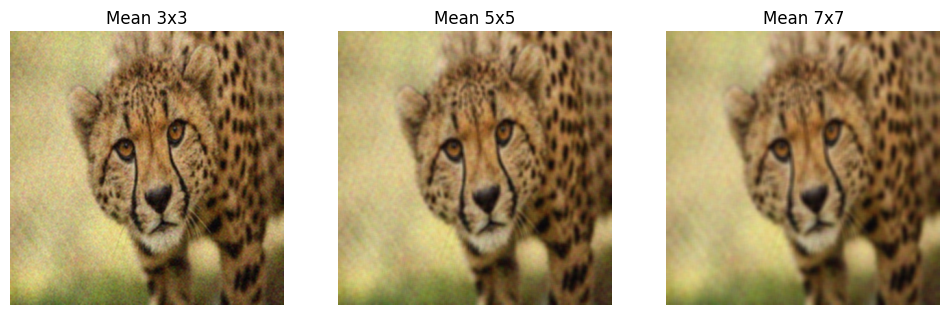

In [57]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load noisy image
noisy = cv.imread("Q5_gaussian_noise.jpg")

# Apply mean filters with 3x3, 5x5, 7x7
mean3 = cv.blur(noisy, (3,3))
mean5 = cv.blur(noisy, (5,5))
mean7 = cv.blur(noisy, (7,7))

# Show results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv.cvtColor(mean3, cv.COLOR_BGR2RGB)); plt.title("Mean 3x3"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv.cvtColor(mean5, cv.COLOR_BGR2RGB)); plt.title("Mean 5x5"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv.cvtColor(mean7, cv.COLOR_BGR2RGB)); plt.title("Mean 7x7"); plt.axis("off")
plt.show()



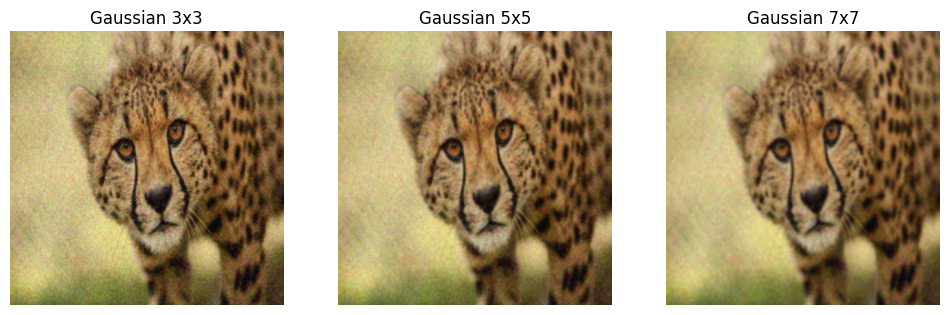

In [58]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load noisy image
noisy = cv.imread("Q5_gaussian_noise.jpg")

# Apply Gaussian filters with 3x3, 5x5, 7x7 kernels
gauss3 = cv.GaussianBlur(noisy, (3,3), 0)
gauss5 = cv.GaussianBlur(noisy, (5,5), 0)
gauss7 = cv.GaussianBlur(noisy, (7,7), 0)

# Show results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv.cvtColor(gauss3, cv.COLOR_BGR2RGB)); plt.title("Gaussian 3x3"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(cv.cvtColor(gauss5, cv.COLOR_BGR2RGB)); plt.title("Gaussian 5x5"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv.cvtColor(gauss7, cv.COLOR_BGR2RGB)); plt.title("Gaussian 7x7"); plt.axis("off")
plt.show()


### Q6

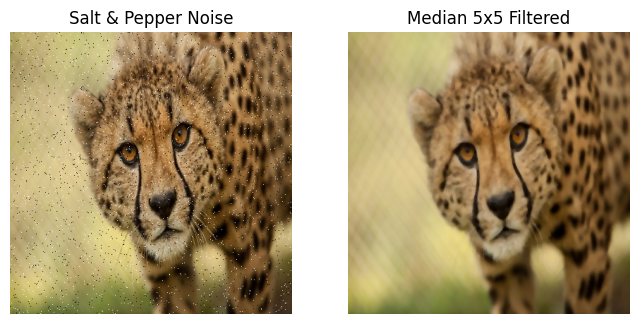

In [62]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load base image
img = cv.imread("ASG3_400x400.jpg")

# --- Step 1: Add Salt & Pepper noise ---
sp = img.copy()
h, w = sp.shape[:2]
num = int(0.02 * h * w)   # 2% of pixels will be noisy

# Add "salt" (white pixels)
ys = np.random.randint(0, h, num // 2)
xs = np.random.randint(0, w, num // 2)
sp[ys, xs] = (255, 255, 255)

# Add "pepper" (black pixels)
ys = np.random.randint(0, h, num // 2)
xs = np.random.randint(0, w, num // 2)
sp[ys, xs] = (0, 0, 0)

# --- Step 2: Apply Median filter (5x5) ---
med5 = cv.medianBlur(sp, 5)

# --- Step 3: Show results ---
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(cv.cvtColor(sp, cv.COLOR_BGR2RGB)); plt.title("Salt & Pepper Noise"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(cv.cvtColor(med5, cv.COLOR_BGR2RGB)); plt.title("Median 5x5 Filtered"); plt.axis("off")
plt.show()



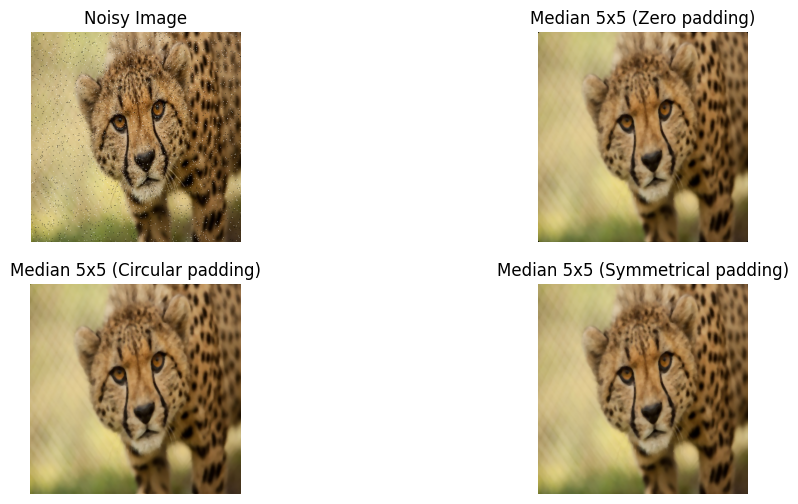

In [63]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load base image
img = cv.imread("ASG3_400x400.jpg")

# --- Step 1: Add Salt & Pepper noise ---
sp = img.copy()
h, w = sp.shape[:2]
num = int(0.02 * h * w)   # 2% noisy pixels

# Salt (white)
ys = np.random.randint(0, h, num // 2)
xs = np.random.randint(0, w, num // 2)
sp[ys, xs] = (255, 255, 255)

# Pepper (black)
ys = np.random.randint(0, h, num // 2)
xs = np.random.randint(0, w, num // 2)
sp[ys, xs] = (0, 0, 0)

# --- Step 2: Apply Median filter with different paddings ---
k = 5
pad = k // 2

# a) Zero padding
sp_zero = cv.copyMakeBorder(sp, pad, pad, pad, pad, borderType=cv.BORDER_CONSTANT, value=[0,0,0])
med_zero = cv.medianBlur(sp_zero, k)[pad:h+pad, pad:w+pad]

# b) Circular padding
sp_circ = cv.copyMakeBorder(sp, pad, pad, pad, pad, borderType=cv.BORDER_WRAP)
med_circ = cv.medianBlur(sp_circ, k)[pad:h+pad, pad:w+pad]

# c) Symmetrical padding
sp_sym = cv.copyMakeBorder(sp, pad, pad, pad, pad, borderType=cv.BORDER_REFLECT)
med_sym = cv.medianBlur(sp_sym, k)[pad:h+pad, pad:w+pad]

# --- Step 3: Show results ---
plt.figure(figsize=(12,6))
plt.subplot(2,2,1); plt.imshow(cv.cvtColor(sp, cv.COLOR_BGR2RGB)); plt.title("Noisy Image"); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(cv.cvtColor(med_zero, cv.COLOR_BGR2RGB)); plt.title("Median 5x5 (Zero padding)"); plt.axis("off")
plt.subplot(2,2,3); plt.imshow(cv.cvtColor(med_circ, cv.COLOR_BGR2RGB)); plt.title("Median 5x5 (Circular padding)"); plt.axis("off")
plt.subplot(2,2,4); plt.imshow(cv.cvtColor(med_sym, cv.COLOR_BGR2RGB)); plt.title("Median 5x5 (Symmetrical padding)"); plt.axis("off")
plt.show()


Q7

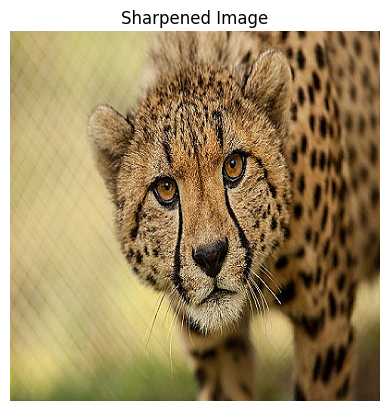

In [65]:
# Q7 Apply sharpening filter on 400x400 image
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load 400x400 image
img = cv.imread("ASG3_400x400.jpg")

# Sharpening kernel
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

# Apply filter
sharp = cv.filter2D(img, -1, kernel)

# Save result
cv.imwrite("Q7_sharpen.jpg", sharp)

# Show result
plt.imshow(cv.cvtColor(sharp, cv.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis("off")
plt.show()


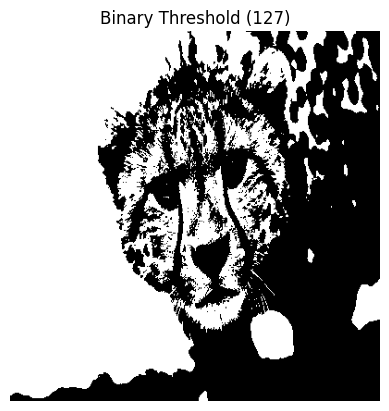

In [66]:
# Q8 Apply thresholding on 400x400 image
import cv2 as cv
import matplotlib.pyplot as plt

# Load 400x400 image
img = cv.imread("ASG3_400x400.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply binary threshold at 127
_, th = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

# Save result
cv.imwrite("Q8_threshold_127.jpg", th)

# Show result
plt.imshow(th, cmap="gray")
plt.title("Binary Threshold (127)")
plt.axis("off")
plt.show()



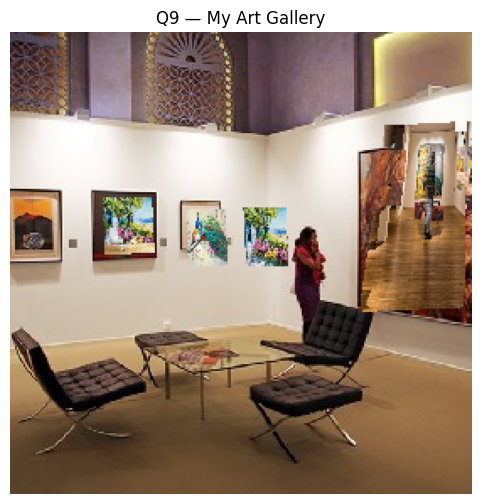

Saved: /content/Q9_gallery_result.jpg


In [54]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --------- Inputs ---------
gallery = cv.imread("/content/Picture1.jpg")
arts = [
    cv.imread("/content/34.jpg"),
    cv.imread("/content/22.jpg"),
    cv.imread("/content/40.jpg"),
    cv.imread("/content/your-visit-art-gallery.jpg"),
]
assert gallery is not None, "Missing /content/Picture1.jpg"
assert all(a is not None for a in arts), "One or more art files not found."

H, W = gallery.shape[:2]

# --------- Frame corners as PERCENTAGES (TL, TR, BR, BL) tuned for Picture1.jpg ---------
frames_pct = [
    # small 1 (left) → widened left and right
    [(0.185, 0.310), (0.315, 0.315), (0.325, 0.520), (0.195, 0.525)],

    # small 2 (middle) → widened both sides
    [(0.365, 0.335), (0.475, 0.335), (0.485, 0.550), (0.375, 0.555)],

    # small 3 (right) → widened both sides
    [(0.490, 0.330), (0.605, 0.325), (0.615, 0.555), (0.500, 0.555)],

    # big frame (right wall) → widened slightly on both sides
    [(0.810, 0.110), (1.000, 0.100), (0.990, 0.750), (0.720, 0.760)],
]


frames_pts = [np.float32([[x*W, y*H] for (x,y) in quad]) for quad in frames_pct]

# --------- Helpers ---------
def letterbox_square(img, out=700):
    h,w = img.shape[:2]
    s = out / max(h,w)
    nh, nw = int(h*s), int(w*s)
    resized = cv.resize(img, (nw,nh), interpolation=cv.INTER_AREA)
    canvas = np.zeros((out,out,3), dtype=np.uint8)
    y0 = (out-nh)//2; x0 = (out-nw)//2
    canvas[y0:y0+nh, x0:x0+nw] = resized
    return canvas

def order_pts(pts):
    pts = np.array(pts, dtype=np.float32)
    s = pts.sum(axis=1)
    d = np.diff(pts, axis=1)
    ordered = np.zeros((4,2), np.float32)
    ordered[0] = pts[np.argmin(s)]   # TL
    ordered[2] = pts[np.argmax(s)]   # BR
    ordered[1] = pts[np.argmin(d)]   # TR
    ordered[3] = pts[np.argmax(d)]   # BL
    return ordered

def place_art(base, art, dst_pts):
    art = letterbox_square(art, 700)                 # keep content undistorted
    h, w = art.shape[:2]
    src = np.float32([[0,0],[w,0],[w,h],[0,h]])
    dst = order_pts(dst_pts)
    M = cv.getPerspectiveTransform(src, dst)
    warped = cv.warpPerspective(art, M, (base.shape[1], base.shape[0]))

    # mask (erode a bit to preserve the physical frame border)
    mask = cv.threshold(cv.cvtColor(warped, cv.COLOR_BGR2GRAY), 1, 255, cv.THRESH_BINARY)[1]
    mask = cv.erode(mask, cv.getStructuringElement(cv.MORPH_RECT,(7,7)), iterations=1)

    bg = cv.bitwise_and(base, base, mask=cv.bitwise_not(mask))
    fg = cv.bitwise_and(warped, warped, mask=mask)
    return cv.add(bg, fg)

# --------- Compose final gallery ---------
out = gallery.copy()
for i in range(4):
    out = place_art(out, arts[i], frames_pts[i])

# --------- Show & save ---------
plt.figure(figsize=(10,6))
plt.imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
plt.axis("off"); plt.title("Q9 — My Art Gallery")
plt.show()

cv.imwrite("/content/Q9_gallery_result.jpg", out)
print("Saved: /content/Q9_gallery_result.jpg")
